In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("../data/processed/train.csv")
test = pd.read_csv("../data/processed/test_holdout.csv")
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (217044, 18)
Test shape: (38303, 18)


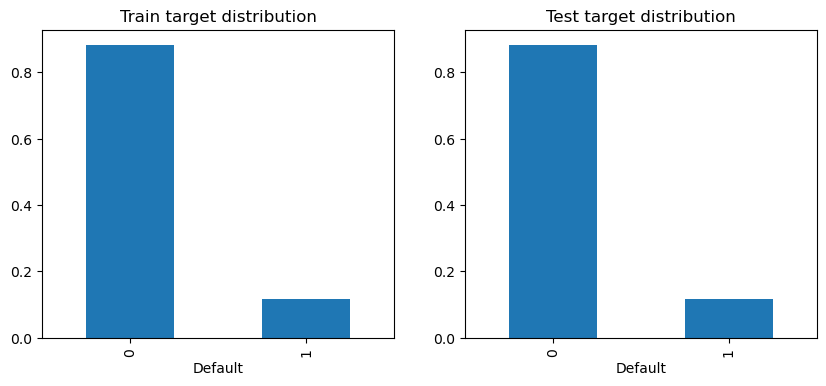

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
train['Default'].value_counts(normalize=True).plot(kind="bar", ax=ax[0], title="Train target distribution")
test['Default'].value_counts(normalize=True).plot(kind="bar", ax=ax[1], title="Test target distribution")
plt.show()

In [4]:
# Revisar nulos
print("\nValores nulos por columna (train):")
print(train.isnull().sum().sort_values(ascending=False).head(10))


Valores nulos por columna (train):
LoanID            0
Age               0
HasCoSigner       0
LoanPurpose       0
HasDependents     0
HasMortgage       0
MaritalStatus     0
EmploymentType    0
Education         0
DTIRatio          0
dtype: int64


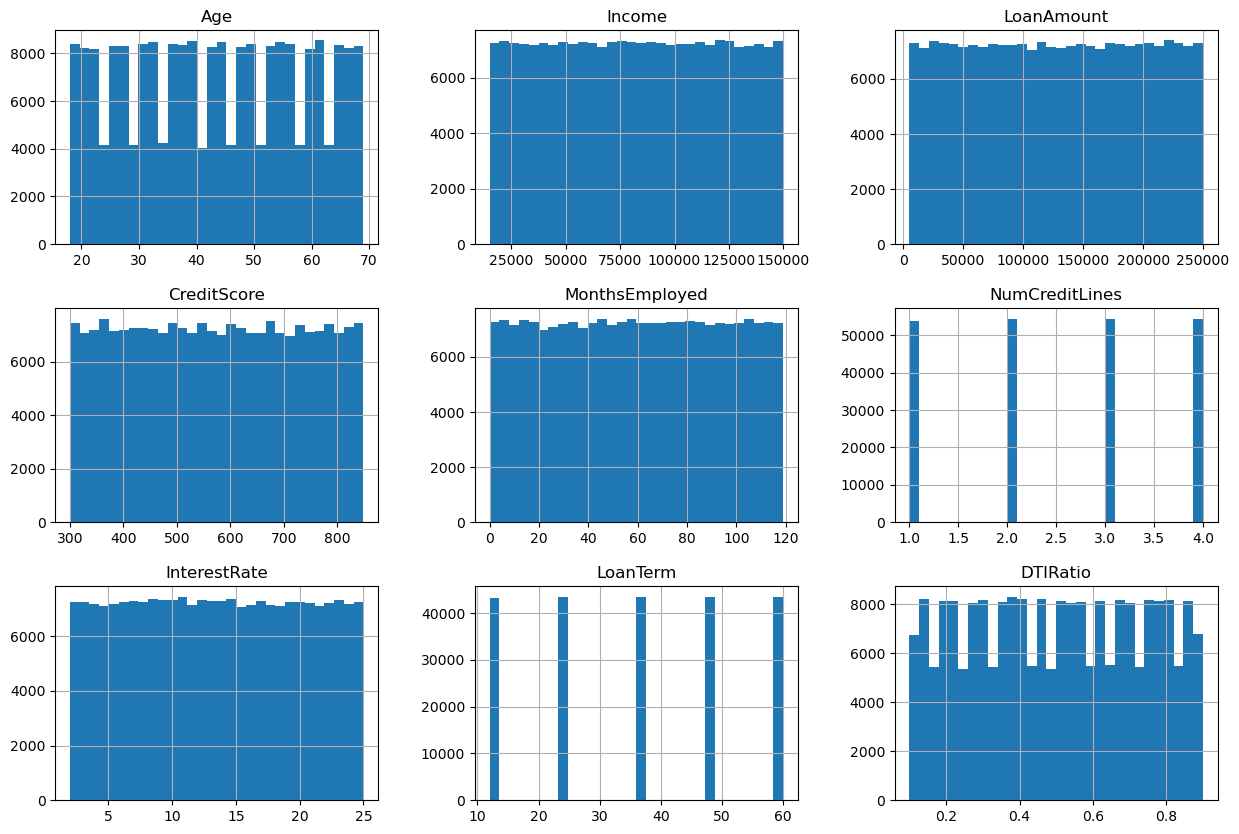

In [5]:
# Distribuciones de variables numéricas
num_cols = ['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio']
train[num_cols].hist(figsize=(15,10), bins=30)
plt.show()

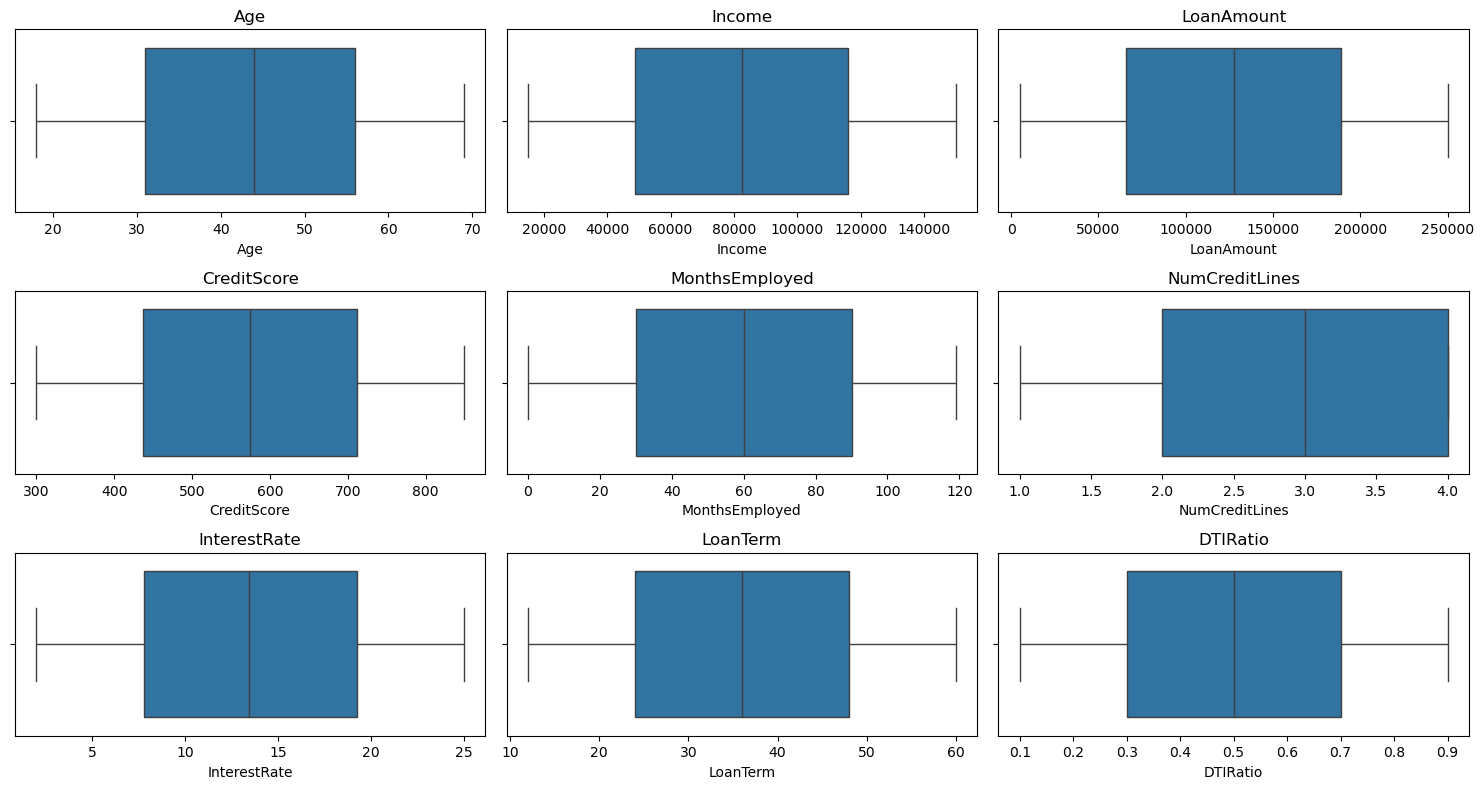

In [6]:
# Boxplots para detectar outliers
plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

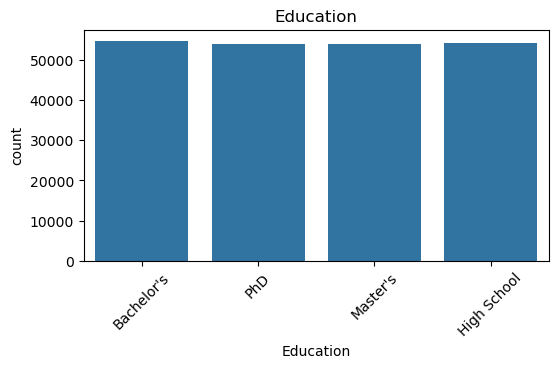

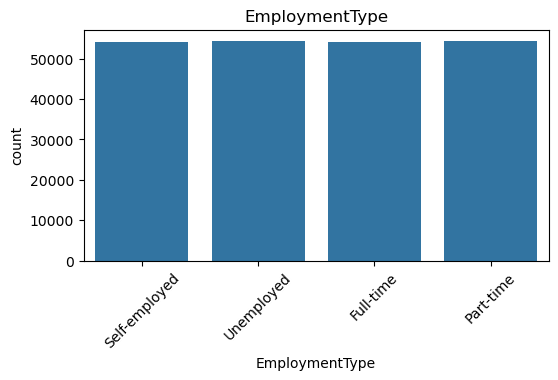

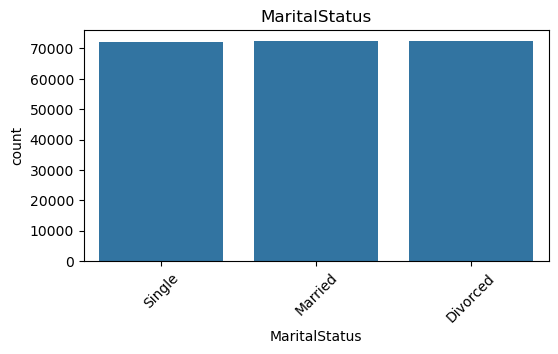

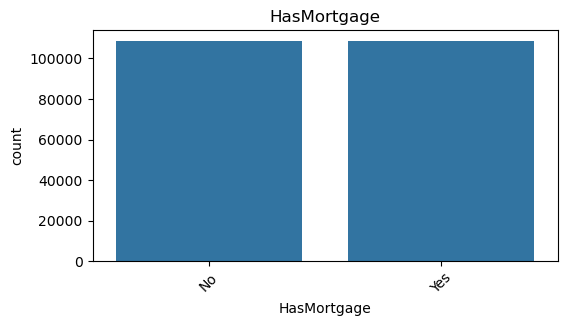

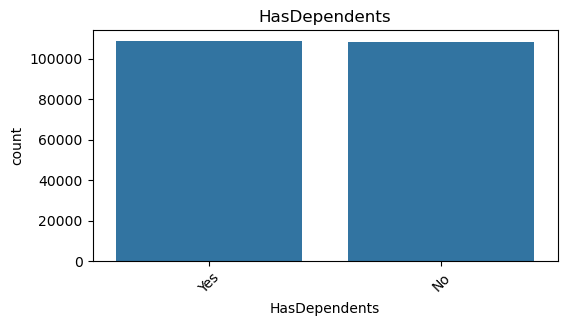

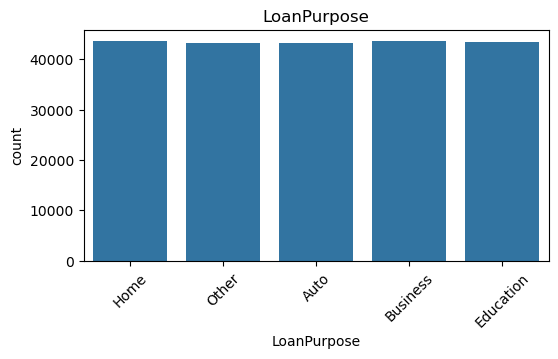

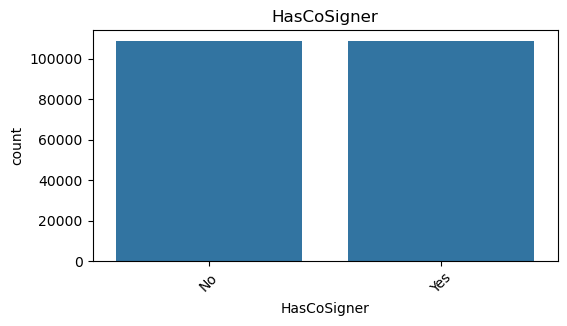

In [7]:
# Variables categóricas (frecuencia)
cat_cols = ['Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner']
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=train[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()


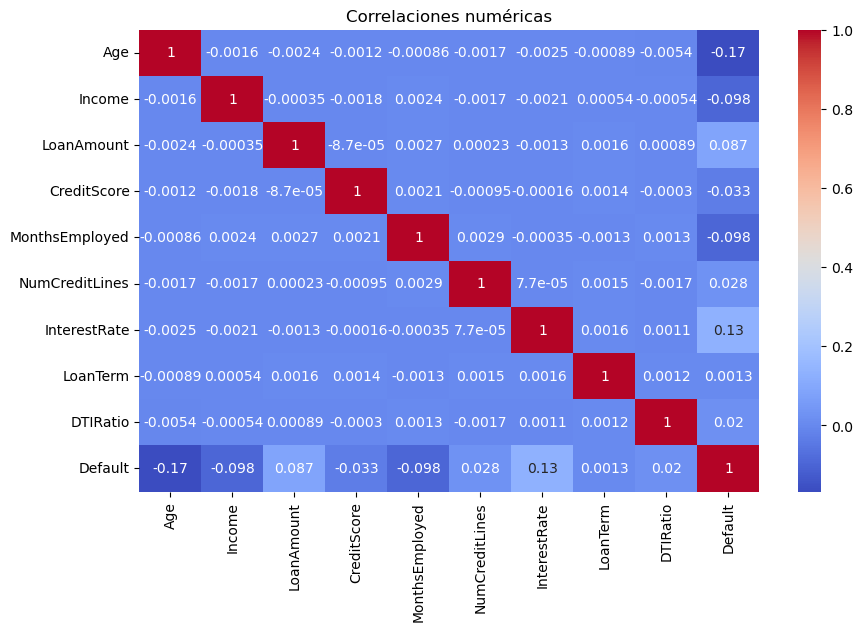

In [8]:
# Correlaciones numéricas con el target
corr = train[num_cols + ['Default']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlaciones numéricas")
plt.show()